## CHAPTER 17
---
# SUPPORT VECTOR MACHINES

---
- To understand support vector machines, we must understand hyperplanes. Formally, a hyperplane is an n – 1 subspace in an n-dimensional space. While that sounds complex, it actually is pretty simple. For example, if we wanted to divide a two-dimensional space, we’d use a one-dimensional hyperplane (i.e., a line). If we wanted to divide a three-dimensional space, we’d use a two-dimensional hyperplane (i.e., a flat piece of paper or a bed sheet). A hyperplane is simply a generalization of that concept into n dimensions.


- *Support vector machines classify data by finding the hyperplane that maximizes the margin between the classes* in the training data. In a two-dimensional example with two classes, we can think of a hyperplane as the widest straight “band” (i.e., line with margins) that separates the two classes.


- In this chapter, we cover training support vector machines in a variety of situations and dive under the hood to look at how we can extend the approach to tackle common problems.

## 17.1 Training a Linear Classifier

- You need to train a model to classify observations
- Use a support vector classifier (SVC) to find the hyperplane that maximizes the margins between the classes

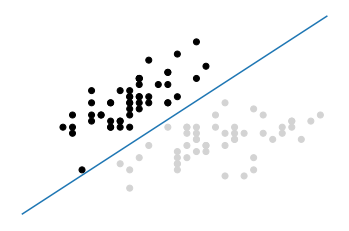

Predicted Class: [0]


In [1]:
# Load libraries
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:100,:2]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(features_standardized, target)

# Load library
from matplotlib import pyplot as plt

# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show()

# Create new observation
new_observation = [[ -2,  3]]

# Predict class of new observation
print('Predicted Class:', svc.predict(new_observation))

#### Discussion:
- For the sake of visualization we limited our example to a binary example (e.g., only two classes); however, SVCs can work well with multiple classes. Note that as our visualization shows, the hyperplane is by definition linear (i.e., not curved). This was okay in this example because the data was linearly separable, meaning there was a hyperplane that could perfectly separate the two classes. 


- Unfortunately, in the real world this will rarely be the case. More typically, we will not be able to perfectly separate classes. In these situations there is a balance between SVC maximizing the margin of the hyperplane and minimizing the misclassification. In SVC, the latter is controlled with the hyperparameter C, the penalty imposed on errors


- In scikit-learn, C is determined by the parameter C and defaults to C=1.0. We should treat C as a hyperparameter of our learning algorithm, which we tune using model selection techniques

## 17.2 Handling Linearly Inseparable Classes Using Kernels

- You need to train a support vector classifier, but your classes are linearly inseparable
- Train an extension of a support vector machine using kernel functions to create non‐linear decision boundaries

In [2]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Set randomization seed
np.random.seed(0)

# Generate two features
features = np.random.randn(200, 2)

# Use a XOR gate (you don't need to know what this is) to generate
# linearly inseparable classes
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# Create a support vector machine with a radial basis function kernel
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

# Train the classifier
model = svc.fit(features, target)

#### Discussion:
For reasons best learned elsewhere, a support vector classifier can be represented as:$$
f(x) = \beta_0 + \sum_{i\in s}^{p}{\alpha_i K(x_i, x_{i'})}
$$where $\beta$ is the bias, S is the set of all support vector observations, $\alpha$ are the model parameters to be learned, and $(x_i, x_{i'})$ are pairs of two support vector observations, $x_i$ and $x_{i;}$. Don't worry if you don't understand kernel functions. For our purposes, just realized that K

- determines the type of hyperplane used to separate our classes and
- we create different hyperplanes by using different kernels.

For example if we wanted the basic linear hyperplane used to separate our classes like the one we used in section 17.1, we can use the linear kernel:

$$
K(x_i, x_{i'}) = \sum_{j=1}^{p}{x_{ij}x_{i'j}}
$$
where $p$ is the number of features. However, if we wanted a nonlinear decision boundary, we swap the lienar kernel with a polynomial kernel:$$
K(x_i, x_{i'}) = (1 + \sum_{j=1}^{p}{x_{ij}x_{i'j}})^2
$$where $d$ is the degree of the polynomial kernel function. Alternatively, we can use oen of the most common kernels in support vector machines, teh radial basis funciton kernel:

$$
K(x_i, x_{i'}) = e^{(-\gamma \sum_{j=1}^{p}{(x_{ij}x_{i'j})^2})}
$$
where $\gamma$ is a hyperparameter and must be greater than zero. The main point of the preceding explanation is that if we have linearly inseparable data we can swap out a linear kernel with an alternative kernel to create a nonlinear hyperplane decision boundary.

We can understand the intuition behidn kernels by visualizing a simple example. This function, based on one by Sebastian Raschka, plots the observations and decision boundary hyperlane of a two-dimensional space. You do not need to understand how this function works; I have included it here so you can experiment on your own:

In [12]:
# Plot observations and decision boundary hyperplane
# Skipped because I was getting errors "*c* argument looks like a single numeric RGB or RGBA..."
# Will come back to it

## 17.3 Creating Predicted Probabilities

- You need to know the predicted class probabilities for an observation.
- When using scikit-learn’s SVC, set probability=True, train the model, then use predict_proba to see the calibrated probabilities

In [13]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", probability=True, random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# Create new observation
new_observation = [[.4, .4, .4, .4]]

# View predicted probabilities
model.predict_proba(new_observation)

array([[0.00541761, 0.97348825, 0.02109414]])

#### Discussion: 
SVC’s use of a hyperplane to create decision regions does not naturally output a probability estimate that an observation is a member of a certain class. However, we can in fact output calibrated class probabilities with a few caveats. In an SVC with two classes, Platt scaling can be used, wherein first the SVC is trained, and then a separate cross-validated logistic regression is trained to map the SVC outputs into probabilities:$$
P(y=1 | x) = \frac{1}{1+e^{(A * f(X) + B)}}
$$where A and B are parameter vectors and f is the ith observation's signed distanced from the hyperplane. When we have more than two classes, an extension of Platt scaling is used.

## 17.4 Identifying Support Vectors

- You need to identify which observations are the support vectors of the decision hyperplane.
- Train the model, then use support_vectors_

In [14]:
# Load libraries
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

#Load data with only two classes
iris = datasets.load_iris()
features = iris.data[:100,:]
target = iris.target[:100]

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Create support vector classifier object
svc = SVC(kernel="linear", random_state=0)

# Train classifier
model = svc.fit(features_standardized, target)

# View support vectors
model.support_vectors_

array([[-0.5810659 ,  0.42196824, -0.80497402, -0.50860702],
       [-1.52079513, -1.67737625, -1.08231219, -0.86427627],
       [-0.89430898, -1.4674418 ,  0.30437864,  0.38056609],
       [-0.5810659 , -1.25750735,  0.09637501,  0.55840072]])

#### Discussion:
Support vector machines get their name from the fact that the hyperplane is being determined by a relatively small number of observations, called the support vectors. Intuitively, think of the hyperplane as being “carried” by these support vectors. 

In [16]:
# View indices of the support vectors
print('Support Vector Indices:', model.support_)

# Find the number of support vectors per class
print('Number of SVs per Class:', model.n_support_)

Support Vector Indices: [23 41 57 98]
Number of SVs per Class: [2 2]
